<a href="https://colab.research.google.com/github/BALaka-18/Statistics-Assignment-2/blob/master/Copy_of_Statistics_Assignment(PDF%26CDF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as ml
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
ml.style.use('ggplot')

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
hab = pd.read_csv('/content/gdrive/My Drive/haberman.csv')
hab.head()

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Analyse the above linked dataset as like iris data.

In [27]:
hab.survive.value_counts()

1    225
2     81
Name: survive, dtype: int64

In [0]:
s1 = hab[hab['survive']==1]
s2 = hab[hab['survive']==2]

In [31]:
# Mean

# age
print(np.mean(s1['age']))
print(np.mean(s2['age']),"\n")

# year
print(np.mean(s1['year']))
print(np.mean(s2['year']),"\n")

# nodes
print(np.mean(s1['nodes']))
print(np.mean(s2['nodes']))

52.01777777777778
53.67901234567901 

62.86222222222222
62.82716049382716 

2.7911111111111113
7.45679012345679


In [32]:
# Median

# age
print(np.median(s1['age']))
print(np.median(s2['age']),"\n")

# year
print(np.median(s1['year']))
print(np.median(s2['year']),"\n")

# nodes
print(np.median(s1['nodes']))
print(np.median(s2['nodes']))

52.0
53.0 

63.0
63.0 

0.0
4.0


In [33]:
# Mode

from scipy.stats import mode

print(mode(s1['age']))
print(mode(s2['age']))

ModeResult(mode=array([50]), count=array([10]))
ModeResult(mode=array([53]), count=array([6]))


Q1-- Plot Histogram for all features of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

In [0]:
#Write your code here for ploting--

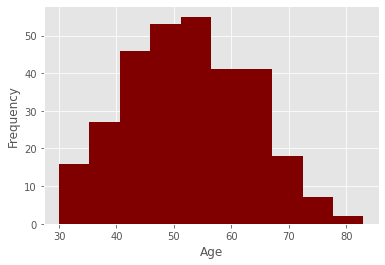

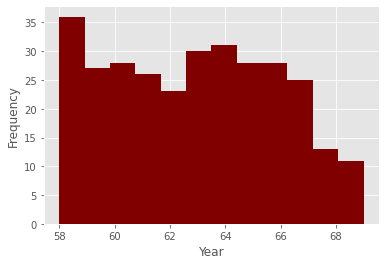

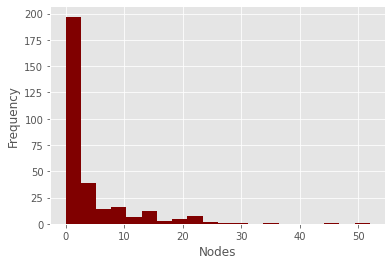

In [26]:
# Age
plt.hist(hab.age,bins=10,color='maroon')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Year
plt.hist(hab.year,bins=12,color='maroon')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# Nodes
plt.hist(hab.nodes,bins=20,color='maroon')
plt.xlabel("Nodes")
plt.ylabel("Frequency")
plt.show()

In [0]:
# Write your comments here--

Upon comparing the 3 graphs, we see that :

1. Graph 1, for the feature 'Age' has an almost normal distribution

2. Graph 2, for the feature 'Year', is right skewed, means, the data is non-uniform. 

3. The graph for the 3rd feature, Nodes, is highly right skewed, and has too many outliers. Definitely, the worst choice for predicting the survival status.

So, the best choice for predicting survival status is **Age**

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [4]:
delv = pd.read_csv('/content/gdrive/My Drive/deliveries.csv')
delv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
# Give your comments here
def fun1(name,matches):
  new = delv[delv['batsman']==name]
  return sum(new.groupby('match_id')['batsman_runs'].agg(sum).head(matches).values)

# Test
fun1('RG Sharma',18)

399

Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

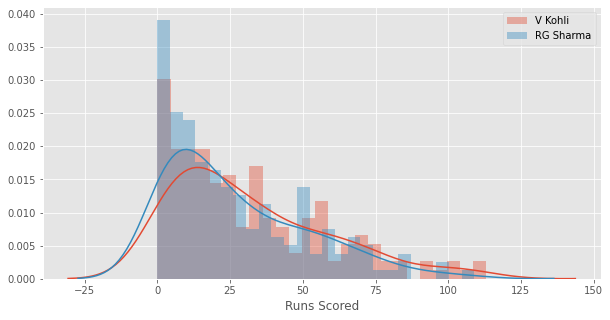

In [36]:
def fun2(name1,name2):
  plt.figure(figsize=(10,5))
  sns.distplot(pd.DataFrame(delv[delv['batsman']==name1].groupby('match_id')['batsman_runs'].agg(sum))['batsman_runs'],bins=25,kde=True)
  sns.distplot(pd.DataFrame(delv[delv['batsman']==name2].groupby('match_id')['batsman_runs'].agg(sum))['batsman_runs'],bins=25,kde=True)
  plt.xlabel("Runs Scored")
  plt.legend([name1,name2])
  plt.show()

# Test
fun2('V Kohli','RG Sharma')

Q4-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

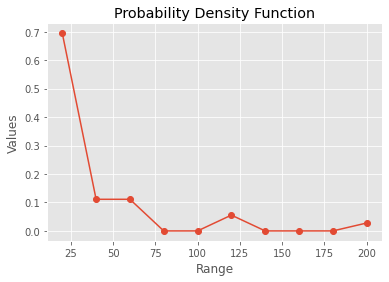

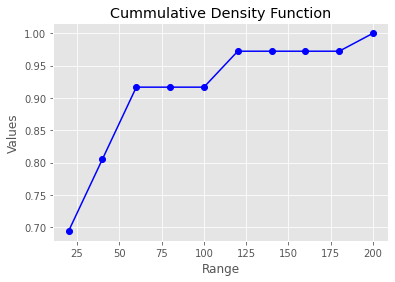

In [21]:
# Write your code here--

# Logic for np.cumsum()
def cumsum(lst):
  cumval = 0
  cumlst = []
  for val in lst:
    cumval = cumval + val
    cumlst.append(cumval)
  return cumlst

# Main function for plotting
def plot(test_list):
  count,bins = np.histogram(test_list,bins=10)        # The bins will give us the ranges we want in our X-axis. The Y-axis will vary according to pdf or cdf. 
  pdf_val = count/sum(count)
  cdf_val = cumsum(pdf_val)
  # pdf
  plt.plot(bins[1:],pdf_val,marker="o")
  plt.xlabel("Range")
  plt.ylabel("Values")
  plt.title("Probability Density Function")
  plt.show()
  # cdf
  plt.plot(bins[1:],cdf_val,color='blue',marker="o")
  plt.xlabel("Range")
  plt.ylabel("Values")
  plt.title("Cummulative Density Function")
  plt.show()

# Test
plot([1,2,3,4,5,5,2,4,7,6,8,9,5,1,0,10,20,31,100,50,1,43,44,2,1,6,12,35,18,19,24,51,101,200,1,3])

# Upon observation of data, we expect a right skewed pdf and an increasing cdf.